(array([0., 1.]), array([3, 2], dtype=int64))
(array([0., 6.]), array([4, 1], dtype=int64))


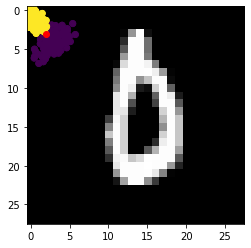

0


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dfx=pd.read_csv('xdata.csv')
dfy=pd.read_csv('ydata.csv')
X=dfx.values
Y=dfy.values
X=X[:,1:]
Y=Y[:,1:].reshape((-1,))
plt.scatter(X[:,0],X[:,1],c=Y)
query_x=np.array([2,3])
plt.scatter(X[:,0],X[:,1],c=Y)
plt.scatter(query_x[0],query_x[1],color='red')
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,queryPoint,k=5):
    
    vals=[]
    
    m=X.shape[0]
    
    for i in range(m):
        d=dist(queryPoint,X[i])
        vals.append((d,Y[i]))
        
    vals=sorted(vals)
    vals=vals[:k]
        
    vals=np.array(vals)
    
    new_vals=np.unique(vals[:,1],return_counts=True)
    print(new_vals)
    
    index=new_vals[1].argmax()
    pred=new_vals[0][index]
    
    return pred
knn(X,Y,query_x)
df=pd.read_csv('train.csv')
data=df.values
X=data[:,1:]
Y=data[:,0]
split=int(0.8*X.shape[0])
X_train=X[:split,:]
Y_train=Y[:split]
X_test=X[split:,:]
Y_test=Y[split:]
def drawImg(sample):
    img=sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()
pred=knn(X_train,Y_train,X_test[89])
drawImg(X_test[89])
print(Y_test[89])